In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sys

%matplotlib inline

In [2]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Python Version:", sys.version)


Pandas version: 0.22.0
Numpy version: 1.14.0
Python Version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### DF Note: By end of document, changes to df include... Striped 0

In [3]:
#read NYC turntable for the week of march 10th
df = pd.read_csv("NYCT180310.csv")

In [4]:
#remove extra spaces in strings of columns
df.columns = df.columns.str.strip()
#df.head(10)

# 1. CLEANING: Ridding the data of weeks with rogue zeros. (new dataframe "df_r")
# 2. CONSOLIDATING: Setting identifer for individual stations (new column "ts")

### NEW DATA FRAME: df_r is data frame with 0s removed, TS (turnstyle) added, DTime (date time), Entries, Exits

In [5]:
#remove reset entries and designate this new dataframe as df_r
df_r = df[df.ENTRIES != 0]
len(df_r[df_r["ENTRIES"] == 0])
print("removed", len(df) - len(df_r), "entries")

removed 3239 entries


In [6]:
# converting to datetime 
#DTime = df_r.dt.time(df.DATE, " ", df.TIME)
#df_r.insert(loc=8, column = 'DTime', value=DTime)
#df_r.head(10)
#date_index
#series.resample('Columnname').sum()

date_time = pd.to_datetime(df_r.DATE + " " + df_r.TIME, format= "%m/%d/%Y %H:%M:%S")
df_r.insert(loc=8, column= "DATE_TIME", value=date_time)
time = df_r.DATE_TIME.dt.time
df_r.insert(loc=9, column = "TIME_TIME", value=time)


In [7]:
weekday = df_r['DATE_TIME'].dt.dayofweek
df_r.insert(loc=10, column = "Weekday", value=weekday)

In [8]:
df_r.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,REGULAR,6536723,2213669


In [9]:
#create a unique string for each turnstile and add it as the 4th index
ts = df_r['C/A']+df_r.UNIT+df_r.SCP+df_r.STATION+df_r.LINENAME
df_r.insert(loc=4, column='TS', value=ts)

df_r.head()

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,REGULAR,6536326,2213531


### NEW DATA FRAME: grpb is grouped by TS and DATE

In [10]:
grpb = df_r.groupby(['TS' , 'DATE'])

# Creating a column for time differences between exits and entrances

In [11]:
difference = grpb['ENTRIES'].diff()
#df_r['Entries_diff'] = grpb['ENTRIES'].diff()
df_r.insert(loc=12, column='Entries_diff', value=difference)


In [12]:
difference2 = grpb['EXITS'].diff()
#df_r['Exits_diff'] = grpb['EXITS'].diff()
df_r.insert(loc=13, column='Exits_diff', value=difference2)


In [13]:
df_r.head(10)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,NaN,NaN,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,11.0,11.0,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,52.0,80.0,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,183.0,45.0,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,278.0,50.0,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,161.0,31.0,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,NaN,NaN,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,8.0,9.0,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,50.0,47.0,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,147.0,43.0,REGULAR,6536723,2213669


# Exploring weird results (may or may not need to handle later, depending, on which stations we select. )

In [ ]:
df_r['Entries_diff'].isnull().sum()

In [ ]:
df_r[df_r.Entries_diff < 0]

In [ ]:
df_r[df_r["Entries_diff"] < 0].groupby(["STATION"]).count()

In [ ]:
len(df_r[df_r["Entries_diff"] < 0].groupby(["STATION"]).count())

In [18]:
df_r.reset_index()

,index,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,03:00:00,2018-03-03 03:00:00,03:00:00,5,NaN,NaN,REGULAR,6535802,2213345
1,1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,07:00:00,2018-03-03 07:00:00,07:00:00,5,11.0,11.0,REGULAR,6535813,2213356
2,2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,11:00:00,2018-03-03 11:00:00,11:00:00,5,52.0,80.0,REGULAR,6535865,2213436
3,3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,15:00:00,2018-03-03 15:00:00,15:00:00,5,183.0,45.0,REGULAR,6536048,2213481
4,4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,19:00:00,2018-03-03 19:00:00,19:00:00,5,278.0,50.0,REGULAR,6536326,2213531
5,5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/03/2018,23:00:00,2018-03-03 23:00:00,23:00:00,5,161.0,31.0,REGULAR,6536487,2213562
6,6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,03:00:00,2018-03-04 03:00:00,03:00:00,6,NaN,NaN,REGULAR,6536518,2213570
7,7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,07:00:00,2018-03-04 07:00:00,07:00:00,6,8.0,9.0,REGULAR,6536526,2213579
8,8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,11:00:00,2018-03-04 11:00:00,11:00:00,6,50.0,47.0,REGULAR,6536576,2213626
9,9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 STNQR456W,NQR456W,BMT,03/04/2018,15:00:00,2018-03-04 15:00:00,15:00:00,6,147.0,43.0,REGULAR,6536723,2213669


# Grouping by station, linename, and time to find average ridership entry for each time of day.

In [37]:
Entries_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME'], as_index = False)['Entries_diff'].apply(np.mean)
#df_r.reset_index()
#print(Entries_diff)
df_r.insert(loc = 13, column='Daily_Entry', value=Entries_diff)

#df_r.head(10)
#df['e'] = df[['a','b','d']].map(sum)


STATION          LINENAME  TIME_TIME
1 AV             L         03:00:00             NaN
                           07:00:00       48.614286
                           11:00:00      417.242857
                           15:00:00      380.528571
                           19:00:00      638.414286
                           23:00:00      391.685714
103 ST           1         00:00:00             NaN
                           04:00:00       13.404762
                           08:00:00      189.690476
                           12:00:00      588.071429
                           16:00:00      419.642857
                           20:00:00      456.238095
                 6         00:00:00             NaN
                           04:00:00       10.071429
                           08:00:00      225.547619
                           12:00:00      491.357143
                           16:00:00      514.476190
                           20:00:00      548.380952
                 BC        

TypeError: incompatible index of inserted column with frame index

In [38]:
Exits_diff = df_r.groupby(['STATION', 'LINENAME' , 'TIME_TIME', ])['Entries_diff'].apply(np.sum)
#df_r.reset_index()
print(Entries_diff)
df_r.insert(loc = 13, column='Daily_Entry', value=Entries_diff)

STATION          LINENAME  TIME_TIME
1 AV             L         03:00:00             NaN
                           07:00:00       48.614286
                           11:00:00      417.242857
                           15:00:00      380.528571
                           19:00:00      638.414286
                           23:00:00      391.685714
103 ST           1         00:00:00             NaN
                           04:00:00       13.404762
                           08:00:00      189.690476
                           12:00:00      588.071429
                           16:00:00      419.642857
                           20:00:00      456.238095
                 6         00:00:00             NaN
                           04:00:00       10.071429
                           08:00:00      225.547619
                           12:00:00      491.357143
                           16:00:00      514.476190
                           20:00:00      548.380952
                 BC        

TypeError: incompatible index of inserted column with frame index

In [ ]:
#difference = grpb['ENTRIES'].diff()
#df_STATIONS = (column='Entries_diff', value=difference)

#df.groupby('l')['v'].apply(pd.Series.sum,skipna=False) # for series, or


### NEW DATA FRAME: df_FourNine is the data frame for a single turnstyle, a single day for 4th ave, 9th street.
Goal: Group by station, and sum each of the arguments under the same datetime. 
<br /> Super Goal: Group by station, sum each over the same date time, and average Entry/Exit data over the whole week. 

In [50]:
df_r['STATION'].unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [40]:
#df_r.loc[df_r['STATION'].isin[('59 ST')]]
#df_r.loc['59 ST','03/03/2018'],['Entries_diff']

df_FourNine = df_r[(df_r['TS'] == 'C012R25801-00-004AV-9 STDFGMNR') & (df_r['DATE'] == '03/06/2018')] 
df_FourNine.head(10)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
21377,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,03:00:00,2018-03-06 03:00:00,03:00:00,1,NaN,NaN,REGULAR,10715840,4273359
21378,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,07:00:00,2018-03-06 07:00:00,07:00:00,1,74.0,52.0,REGULAR,10715914,4273411
21379,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,11:00:00,2018-03-06 11:00:00,11:00:00,1,594.0,108.0,REGULAR,10716508,4273519
21380,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,15:00:00,2018-03-06 15:00:00,15:00:00,1,283.0,77.0,REGULAR,10716791,4273596
21381,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,19:00:00,2018-03-06 19:00:00,19:00:00,1,393.0,76.0,REGULAR,10717184,4273672
21382,C012,R258,01-00-00,4AV-9 ST,C012R25801-00-004AV-9 STDFGMNR,DFGMNR,BMT,03/06/2018,23:00:00,2018-03-06 23:00:00,23:00:00,1,162.0,66.0,REGULAR,10717346,4273738


SyntaxError: invalid syntax (<ipython-input-47-fa0fea22e1fd>, line 1)

# Plotting sample 4th ave, 9th street data as barchart

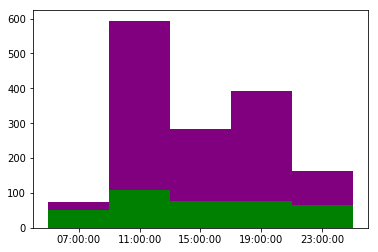

In [41]:
#x = df_r[df_r['STATION'].isin[('RIT-ROOSEVELT')]]
#y = ['Entries_diff']
#x = df_FourNine['TIME'](bar_lefts, bar_heights, width=1.0, facecolor='Purple', edgecolor='Purple')

times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

X = np.arange(5)
plt.bar(times, Entries, color = 'purple', width = 1)
plt.bar(times, Exits, color = 'green', width = 1)
times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

#width = 0.45
#plt.PrePlot(2)
#plt.bar(y, align='left', width = width)
#plt.bar(y2, align='right', width = width)
#plt.Show(xlabel = 'Time of Day' , ylabel = 'Frequency')


# Plotting Sample 4th ave, 9th street Data as line

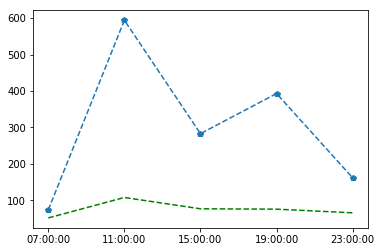

In [42]:
# red dashes, blue squares and green triangles
plt.plot(times, Entries, 'p--', times, Exits, 'g--')

# NEW DATA FRAME: df_Columbus

In [51]:
df_Columbus = df_r[(df_r['STATION'] == '59 ST COLUMBUS') & (df_r['DATE'] == '03/06/2018')] 
df_Columbus.head(10)

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DATE_TIME,TIME_TIME,Weekday,Entries_diff,Exits_diff,DESC,ENTRIES,EXITS
47003,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,03:00:00,2018-03-06 03:00:00,03:00:00,1,NaN,NaN,REGULAR,2641521,10789538
47004,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,07:00:00,2018-03-06 07:00:00,07:00:00,1,12.0,209.0,REGULAR,2641533,10789747
47005,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,11:00:00,2018-03-06 11:00:00,11:00:00,1,88.0,1433.0,REGULAR,2641621,10791180
47006,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,15:00:00,2018-03-06 15:00:00,15:00:00,1,183.0,738.0,REGULAR,2641804,10791918
47007,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,19:00:00,2018-03-06 19:00:00,19:00:00,1,355.0,1083.0,REGULAR,2642159,10793001
47008,N049,R084,01-00-00,59 ST COLUMBUS,N049R08401-00-0059 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,23:00:00,2018-03-06 23:00:00,23:00:00,1,157.0,306.0,REGULAR,2642316,10793307
47046,N049,R084,01-00-01,59 ST COLUMBUS,N049R08401-00-0159 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,03:00:00,2018-03-06 03:00:00,03:00:00,1,NaN,NaN,REGULAR,3359347,6961586
47047,N049,R084,01-00-01,59 ST COLUMBUS,N049R08401-00-0159 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,07:00:00,2018-03-06 07:00:00,07:00:00,1,10.0,127.0,REGULAR,3359357,6961713
47048,N049,R084,01-00-01,59 ST COLUMBUS,N049R08401-00-0159 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,11:00:00,2018-03-06 11:00:00,11:00:00,1,88.0,844.0,REGULAR,3359445,6962557
47049,N049,R084,01-00-01,59 ST COLUMBUS,N049R08401-00-0159 ST COLUMBUSABCD1,ABCD1,IND,03/06/2018,15:00:00,2018-03-06 15:00:00,15:00:00,1,179.0,386.0,REGULAR,3359624,6962943


### Plotting 59th street Columbus Circle

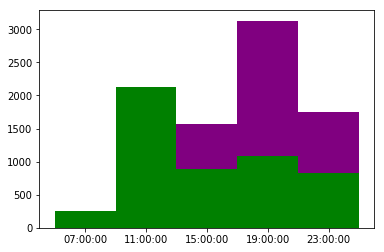

In [58]:
times2 = df_Columbus['TIME']
Entries2 = df_Columbus['Entries_diff']
Exits2 = df_Columbus['Exits_diff']

X = np.arange(5)
plt.bar(times2, Entries2, color = 'purple', width = 1)
plt.bar(times2, Exits2, color = 'green', width = 1)
times = df_FourNine['TIME']
Entries = df_FourNine['Entries_diff']
Exits = df_FourNine['Exits_diff']

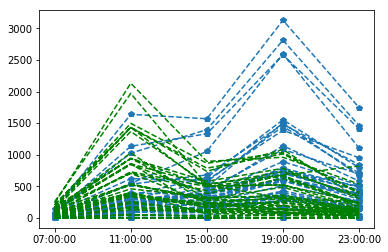

In [60]:
# red dashes, blue squares and green triangles
plt.plot(times2, Entries2, 'p--', times2, Exits2, 'g--')

# OLD. DAY OF WEEK WORK

In [ ]:
# groupby TS and DATE, then create a new column "dif" for max - min
# gb = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.agg(["min", "max"])
# gb2 = df_r.groupby(["TS", "DATE"]).ENTRIES.agg(["min", "max"])
# gb["dif"] = gb["max"] - gb["min"]
# gb2["dif"] = gb2["max"] - gb2["min"]


In [ ]:
# gb.head(10)

In [ ]:

#plt.barh(gb.index.levels[1],gb.dif)
# gb.dif.describe()
#sns.boxplot(gb.dif)
#odd = len(gb[gb.dif > 10000])
#print("there are", odd, "days that had more than 10,000 entries (what I may consider odd/outliers)")


In [ ]:
# Take a look at the outliers >10000
gb[gb.dif > 10000]

In [ ]:
# gb_r is gb with the obviousresets removed
# gb_r = gb[gb.dif < 20000]
# Show boxplot 
# sns.boxplot(gb_r.dif);

In [ ]:
# plt.barh(gb_r[:7].index.levels[4], gb_r[:7]["dif"])
#gb_r.head

In [ ]:
# gb_r.reset_index().head()

In [ ]:
# gb_r.groupby(["STATION"]).agg("sum").sort_values("dif", ascending=False)

In [ ]:
##Disregard this cell. Just for testing

# #df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).count()
# gb3 = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME","DATE"]).ENTRIES.agg(["min", "max"])
# gb3#[gb3["STATION"] == "23 ST"]